<a href="https://colab.research.google.com/github/Bioinformaticsisfun/Bioinformaticsisfun/blob/main/plotlySession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.3 MB/s 
     |████████████████████████████████| 357 kB 54.9 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_table("https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt",
              sep = "\t", header=(0))
df.head()


,id,184A1,184B5,21MT1,21NT,21PT,600MPE,AU565,BT474,BT483,...,SUM225CWN,SUM229PE,SUM52PE,T47D,T47D_Kbluc,UACC812,UACC893,ZR751,ZR7530,ZR75B
0,class,Normal-like,Normal-like,Basal,Basal,Basal,Luminal,Luminal,Luminal,Luminal,...,Luminal,Basal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal
1,ENSG00000000419,6.06,5.25,5.15,5.36,5.22,5.32,5.3,6.64,5.6,...,5.82,6.4,4.67,6.01,6.39,7.71,5.7,5.85,5.34,5.07
2,ENSG00000001036,4.47,5.39,5.28,5.82,5.75,6.11,4.8,4.47,4.99,...,5.51,5.14,6.22,5.07,5.3,5.76,5.4,4.27,5.03,5.68
3,ENSG00000001084,4.47,6,5.77,5.76,5.76,5.78,4.01,5.14,5.11,...,6.63,4.38,6.38,4.52,4.16,3.24,4.35,2.49,5.89,4.37
4,ENSG00000001497,5.27,4.27,6.58,5.54,5.57,4.93,6.16,5.36,5.1,...,4.69,6.16,5.11,4.79,4.95,5.83,4.89,5.33,4.23,6.03


In [4]:
#Parse data for labels and save annotation

labels_list = df.loc[[0]] 
#Make a list of sample names
sample_names = df.loc[0] 
sample_names = list(df)[1:] 

#Make unique list of labels
labels = np.unique(labels_list)

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Group" at index 0 from data
data=df.drop([0]) 

#Remove id from axis
data=data.drop(['id'], axis=1) 
data = data.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 
data.head()


,1,2,3,4,5,6,7,8,9,10,...,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916
184A1,6.06,4.47,4.47,5.27,6.05,6.24,4.17,6.55,5.19,7.12,...,7.34,7.89,5.4,5.28,5.74,0.04,4.39,4.09,2.17,3.99
184B5,5.25,5.39,6,4.27,7.31,5.26,3.51,7.49,4.54,6.53,...,7.53,8.44,5.19,0,5.92,0,4.98,3.9,1.6,4.65
21MT1,5.15,5.28,5.77,6.58,3.99,5.67,3.86,5.69,4.64,6.17,...,7.43,4.7,5.27,5.99,1.91,0,4.78,6.49,2.7,5.92
21NT,5.36,5.82,5.76,5.54,5.93,6.11,5.12,5,4.64,6.76,...,7.61,5.24,5.54,7.25,2.1,0.16,5.07,6.22,3.12,5.89
21PT,5.22,5.75,5.76,5.57,5.98,5.77,4.75,4.9,4.81,6.64,...,7.57,4.8,5.33,7.6,2.66,0,4.81,6.35,3.79,5.97


In [5]:
flabels

array(['Normal-like', 'Normal-like', 'Basal', 'Basal', 'Basal', 'Luminal',
       'Luminal', 'Luminal', 'Luminal', 'Claudin-low', 'Luminal',
       'Luminal', 'Luminal', 'Luminal', 'Basal', 'Claudin-low', 'Luminal',
       'Luminal', 'Basal', 'Basal', 'Basal', 'Basal', 'Luminal', 'Basal',
       'Claudin-low', 'Basal', 'Claudin-low', 'Basal', 'Luminal',
       'Normal-like', 'Normal-like', 'Normal-like', 'Luminal', 'Luminal',
       'Luminal', 'Claudin-low', 'Luminal', 'Luminal', 'Basal', 'Luminal',
       'Claudin-low', 'Basal', 'Luminal', 'Basal', 'Luminal', 'Luminal',
       'Luminal', 'Luminal', 'Luminal', 'Luminal', 'Luminal', 'Luminal'],
      dtype=object)

In [6]:
labels

array(['Basal', 'Claudin-low', 'Luminal', 'Normal-like', 'class'],
      dtype=object)

In [7]:
labels = np.delete(labels, np.where(labels == 'class'))
labels


array(['Basal', 'Claudin-low', 'Luminal', 'Normal-like'], dtype=object)

In [8]:
sample_names

['184A1',
 '184B5',
 '21MT1',
 '21NT',
 '21PT',
 '600MPE',
 'AU565',
 'BT474',
 'BT483',
 'BT549',
 'CAMA1',
 'EFM192A',
 'EFM192B',
 'EFM192C',
 'HCC1143',
 'HCC1395',
 'HCC1419',
 'HCC1428',
 'HCC1569',
 'HCC1806',
 'HCC1937',
 'HCC1954',
 'HCC202',
 'HCC3153',
 'HCC38',
 'HCC70',
 'HS578T',
 'JIMT1',
 'LY2',
 'MCF10A',
 'MCF10F',
 'MCF12A',
 'MCF7',
 'MDAMB134VI',
 'MDAMB175VII',
 'MDAMB231',
 'MDAMB361',
 'MDAMB453',
 'MX1',
 'SKBR3',
 'SUM1315MO2',
 'SUM149PT',
 'SUM225CWN',
 'SUM229PE',
 'SUM52PE',
 'T47D',
 'T47D_Kbluc',
 'UACC812',
 'UACC893',
 'ZR751',
 'ZR7530',
 'ZR75B']

PCA for exploratory analysis

In [9]:
#Run PCA
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#Run Principal Component Analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=3) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)


In [10]:
xpca

array([[  2.23520871,  36.25016303, -12.3949648 ],
       [ 12.46056327,  16.66341674, -13.81072134],
       [-46.28145328,  25.10975513,   7.75426713],
       [-34.9076853 ,  23.16160873,   8.42425637],
       [-38.83940977,  24.638098  ,   9.59330034],
       [ 74.92456447, -21.36342193,  -2.88062614],
       [-53.78181406, -21.82142359,  -1.9306642 ],
       [ 57.19991723, -31.32690653,  -5.00618283],
       [ 14.8251811 , -35.06802417,   0.46672991],
       [ 22.09194872,  44.37835195,  -3.65690339],
       [ 25.5307177 , -21.83965518,  -1.33247526],
       [-49.89982047, -26.875226  ,  -3.09838814],
       [-59.788248  , -17.19685299,   0.21206729],
       [-62.40392035, -32.95002858,   1.08279785],
       [ 15.87958473,  28.94038386,   6.82919622],
       [ 54.21513528,  32.15446968,  13.0804913 ],
       [ 28.32021664, -36.79085539,  -3.20865495],
       [  8.34415417, -27.35779656,   4.08490674],
       [ 13.29933662,  13.48686274,  -2.46496078],
       [ 19.76058633,  36.17205

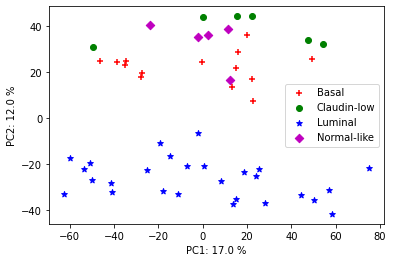

In [11]:
#matplotlib scatter plot
#set which PCs to use
PC1 = 0
PC2 = 1
#Scatter plot, for loop through PCA data and check full labels list for group to set marker
for i in range(0, xpca.shape[0]):
    if flabels[i] == 'Basal':
        c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
        #plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=8)
    elif flabels[i] == 'Claudin-low':
        c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
        #plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=8)
    elif flabels[i] == 'Luminal':
        c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
        #plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=8)
    elif flabels[i] == 'Normal-like':
        c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m', marker='D')
        #plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=8)
        #Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['Basal', 'Claudin-low', 'Luminal', 'Normal-like'])
plt.xlabel(f'PC1: {round(pca.explained_variance_ratio_[0],2)*100} %')
plt.ylabel(f'PC2: {round(pca.explained_variance_ratio_[1],2)*100} %')

#set plot size
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()




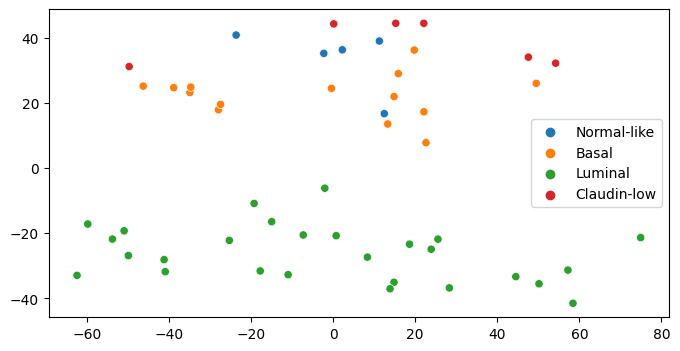

In [12]:
seaborn.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=flabels)


In [14]:
import plotly.express as px
figPCA2D = px.scatter(xpca, x=0, y=1, color=flabels, hover_name = sample_names)
figPCA2D.show()


In [17]:
import plotly.express as px
figPCA3D = px.scatter_3d(xpca, x=0, y=1, z=2, color=flabels, hover_name = sample_names)
figPCA3D.show()


Histogram

In [18]:
import plotly.express as px
import pandas as pd
ExpressionTable = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_15Genes_1.txt', sep='\t', header=0)
ExpressionTable.index=ExpressionTable['id']
ExpressionTable = ExpressionTable.drop(['id'], axis = 1) 
samples = ExpressionTable.columns
ExpressionTable.head()


,184A1,184B5,21MT1,21NT,21PT,600MPE,AU565,BT474,BT483,BT549,...,SUM225CWN,SUM229PE,SUM52PE,T47D,T47D_Kbluc,UACC812,UACC893,ZR751,ZR7530,ZR75B
id,,,,,,,,,,,,,,,,,,,,,
ENSG00000011465,0.000000,0.454356,0.000000,0.137504,0.000000,0.000000,0.000000,0.000000,0.000000,6.913510,...,0.000000,0.310349,0.286975,1.091038,0.214116,0.000000,0.000000,0.238818,1.091038,0.238818
ENSG00000057149,2.039323,2.274744,0.774070,2.370448,1.400760,0.000000,0.056657,0.000000,0.000000,0.000000,...,0.000000,1.815374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000065618,8.505478,9.134248,0.713914,0.344852,0.286975,0.263167,0.226562,1.520781,0.274943,0.070318,...,1.844020,3.794004,2.419633,0.000000,0.163531,0.097694,0.286975,0.565594,0.111089,0.201753
ENSG00000083720,5.199763,3.975563,3.253808,3.702386,3.727587,5.161704,0.356146,6.481200,4.182265,5.332670,...,2.546144,2.462415,1.256809,0.941377,0.000000,1.959648,4.287152,3.870967,3.948192,4.185121
ENSG00000095139,5.980138,4.938758,5.641512,5.797871,5.884528,5.294528,5.305284,6.112363,5.720148,6.489122,...,5.194882,4.651136,5.526647,6.243755,6.205211,5.455068,5.274977,5.891424,5.694583,5.315063


In [19]:
import numpy as np
import math
ExpressionTableLn =  np.log(ExpressionTable)

for i in samples[0:3]:
  fig = px.histogram(ExpressionTableLn[i], nbins=100, title=i, marginal="box", color_discrete_sequence=["red","blue"], opacity=0.5)
  fig.show()


microbiome data

In [20]:
filelink = 'https://raw.githubusercontent.com/PineBiotech/omicslogic/master/diet_HFD_Abundance_table.txt'
df = pd.read_table(filelink,sep='\t',header=(0), index_col = (0)) 
df.head()


,BKCM01,BKCM02,BKCM03,BKCM13,BKCM14,BKCM15,BKF01,BKF02,BKF03,BKF13,BKF14,BKF15
OTUs,,,,,,,,,,,,
OTU_1,300,203,310,89,158,119,411,406,469,299,232,534
OTU_2,165,145,85,264,510,329,470,394,172,169,76,351
OTU_3,22,0,0,396,1170,366,0,0,0,417,64,463
OTU_4,37,61,61,183,302,190,313,389,322,245,148,249
OTU_5,96,59,74,129,388,220,0,0,0,384,266,471


In [21]:
#Creating a Barplot by taxa
taxalink = 'https://raw.githubusercontent.com/PineBiotech/omicslogic/master/diet_HFD_Taxonomy_table.txt'
taxa = pd.read_table(taxalink,sep='\t',header=(0), index_col = (0))
taxa
Family = list(taxa.Family)
Phylum = list(taxa.Phylum)
taxa.head()


,Kingdom,Phylum,Class,Order,Family,Genus,Species
class,,,,,,,
OTU_1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidales_S24-7_group,NaN,NaN
OTU_2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,NaN
OTU_3,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_NK4A136_group,NaN
OTU_4,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidales_S24-7_group,NaN,NaN
OTU_5,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidales_S24-7_group,NaN,NaN


In [22]:
metadata = 'https://raw.githubusercontent.com/PineBiotech/omicslogic/master/diet_HFD_supplementaryTable_fecal_cecal.txt'
meta = pd.read_table(metadata,sep='\t',header=(0), index_col = (0))
meta.head()


,Diet,Source
Run,,
BKCM1,CHOW,Cecal
BKCM2,CHOW,Cecal
BKCM3,CHOW,Cecal
BKCM13,HFD,Cecal
BKCM14,HFD,Cecal


In [23]:
sample_names = list(meta.index)
diet = list(meta.Diet)
source = list(meta.Source)


In [24]:
sample_names = list(meta.index)
diet = list(meta.Diet)
source = list(meta.Source)
df.insert(0,'Family',Family, True)
df = df.groupby('Family').sum()
df.head()


,BKCM01,BKCM02,BKCM03,BKCM13,BKCM14,BKCM15,BKF01,BKF02,BKF03,BKF13,BKF14,BKF15
Family,,,,,,,,,,,,
Anaeroplasmataceae,3,0,3,16,81,39,15,5,6,40,28,56
Bacteroidaceae,409,480,400,35,917,488,0,0,0,0,0,0
Bacteroidales_S24-7_group,2703,2673,2614,1436,3522,2360,2901,3762,2926,2571,1827,3515
Christensenellaceae,0,0,0,0,4,5,0,0,0,0,4,0
Clostridiaceae_1,0,0,0,0,0,0,8,11,0,0,0,0


In [25]:
dft = df.transpose()
dft.fillna(0, inplace=True)
dft.insert(0,'Sample',sample_names, True)
dft.insert(1,'Group',diet, True)
dft.head()


Family,Sample,Group,Anaeroplasmataceae,Bacteroidaceae,Bacteroidales_S24-7_group,Christensenellaceae,Clostridiaceae_1,Clostridiales_vadinBB60_group,Coriobacteriaceae,Defluviitaleaceae,...,Erysipelotrichaceae,Family_XIII,Lachnospiraceae,Lactobacillaceae,Peptococcaceae,Porphyromonadaceae,Rikenellaceae,Ruminococcaceae,Unknown_Family,Verrucomicrobiaceae
BKCM01,BKCM1,CHOW,3,409,2703,0,0,13,0,16,...,5,10,2489,17,30,0,165,1274,0,119
BKCM02,BKCM2,CHOW,0,480,2673,0,0,4,0,4,...,0,0,2126,25,26,0,145,846,0,4
BKCM03,BKCM3,CHOW,3,400,2614,0,0,18,0,9,...,0,8,2432,18,38,0,85,1276,0,7
BKCM13,BKCM13,HFD,16,35,1436,0,0,60,0,0,...,23,0,2365,4,21,60,753,1409,9,0
BKCM14,BKCM14,HFD,81,917,3522,4,0,40,13,0,...,42,12,5685,59,95,99,1771,2183,0,12


In [26]:
dft = df.transpose()
dft.fillna(0, inplace=True)
dft.insert(0,'Sample',sample_names, True)
dft.insert(1,'Group',diet, True)
dft.head()


Family,Sample,Group,Anaeroplasmataceae,Bacteroidaceae,Bacteroidales_S24-7_group,Christensenellaceae,Clostridiaceae_1,Clostridiales_vadinBB60_group,Coriobacteriaceae,Defluviitaleaceae,...,Erysipelotrichaceae,Family_XIII,Lachnospiraceae,Lactobacillaceae,Peptococcaceae,Porphyromonadaceae,Rikenellaceae,Ruminococcaceae,Unknown_Family,Verrucomicrobiaceae
BKCM01,BKCM1,CHOW,3,409,2703,0,0,13,0,16,...,5,10,2489,17,30,0,165,1274,0,119
BKCM02,BKCM2,CHOW,0,480,2673,0,0,4,0,4,...,0,0,2126,25,26,0,145,846,0,4
BKCM03,BKCM3,CHOW,3,400,2614,0,0,18,0,9,...,0,8,2432,18,38,0,85,1276,0,7
BKCM13,BKCM13,HFD,16,35,1436,0,0,60,0,0,...,23,0,2365,4,21,60,753,1409,9,0
BKCM14,BKCM14,HFD,81,917,3522,4,0,40,13,0,...,42,12,5685,59,95,99,1771,2183,0,12


In [28]:
long_df1 = dft.melt(id_vars=["Sample", "Group"],
             var_name="Taxa",
             value_name="Abundance")
long_df1.fillna("Unknown", inplace=True)
long_df1.head()


,Sample,Group,Taxa,Abundance
0,BKCM1,CHOW,Anaeroplasmataceae,3
1,BKCM2,CHOW,Anaeroplasmataceae,0
2,BKCM3,CHOW,Anaeroplasmataceae,3
3,BKCM13,HFD,Anaeroplasmataceae,16
4,BKCM14,HFD,Anaeroplasmataceae,81


In [29]:
import plotly.express as px
fig = px.bar(long_df1, x="Sample", y="Abundance", color="Taxa", title="Taxa Abundance Bar Plots", template="plotly_white", color_discrete_sequence= px.colors.qualitative.Vivid)
fig.update_yaxes(categoryorder='total descending') 
fig.update_layout(barmode="relative")
fig.show()


In [30]:
long_df2 = long_df1
long_df2['Abundance %'] = 100 * long_df2['Abundance'] / long_df2.groupby('Sample')['Abundance'].transform('sum')
long_df2.head()


,Sample,Group,Taxa,Abundance,Abundance %
0,BKCM1,CHOW,Anaeroplasmataceae,3,0.041017
1,BKCM2,CHOW,Anaeroplasmataceae,0,0.000000
2,BKCM3,CHOW,Anaeroplasmataceae,3,0.042900
3,BKCM13,HFD,Anaeroplasmataceae,16,0.256246
4,BKCM14,HFD,Anaeroplasmataceae,81,0.550496


In [31]:
import plotly.express as px
fig = px.bar(long_df2, x="Sample", y="Abundance %", color="Taxa", title="Taxa Abundance Bar Plots", template="plotly_white", color_discrete_sequence= px.colors.qualitative.Vivid)
fig.update_yaxes(categoryorder='total descending') 
fig.update_layout(barmode="relative")
fig.show()


DEG downstream analysis

In [32]:
!pip install dash
!pip install dash_bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.2 MB 4.1 MB/s 
     |████████████████████████████████| 278 kB 45.7 MB/s 
     |████████████████████████████████| 2.6 MB 37.5 MB/s 
     |████████████████████████████████| 752 kB 38.9 MB/s 
     |████████████████████████████████| 2.3 MB 46.3 MB/s 
  Created wheel for dash-bio: filename=dash_bio-1.0.2-py3-none-any.whl size=10338108 sha256=68c3da664992ed9465027ec8e28ec7f1e17010db06da519f29ab26d42980d9a6
  Stored in directory: /root/.cache/pip/wheels/ff/3a/6d/956f102bccd5b48e709c44bb1e13cd42a7f1fdc5dc9f4a6ba9
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=dad8639793fb3b9800b6a0e84c7fe30cb6f4ec7c3e2312f76e18340e551d15fe
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa6

In [33]:
from pandas._libs.lib import generate_slices
import pandas as pd
import numpy as np
datalink = 'https://raw.githubusercontent.com/PineBiotech/omicslogic/master/HepG_vs_control_DESeq2_input2_new_DeSeq2_All.txt'
df = pd.read_table(datalink, sep='\t', header=0)
df.index=df['GENENAME']
df = df.drop(['GENENAME'], axis = 1)

#df.head()
#prepare a table of significant genes only
Genes = df[df.padj < 0.05]
Genes = Genes[(Genes.log2FoldChange > 1) | (Genes.log2FoldChange < -1)]

#top 50 genes:
Genes1 = Genes.sort_values(by=['padj'], ascending=True)

#clean up the table
lst = ['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'SYMBOL', 'GENENAME.1']
Genes = Genes.drop(lst, axis=1)

#Genes.head()
#len(Genes)


In [34]:
df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,HepG_Control,HepG_Control.1,HepG_Control.2,HepG_Control.3,...,HepG_PCP.10uM.2,HepG_PCP.10uM.2.1,HepG_PCP.10uM.2.2,HepG_PCP.10uM.2.3,HepG_PCP.10uM.1,HepG_PCP.10uM.1.1,HepG_PCP.10uM.1.2,HepG_PCP.10uM.1.3,SYMBOL,GENENAME.1
GENENAME,,,,,,,,,,,,,,,,,,,,,
ENSG00000163631,95153.60727,-0.131938,0.092886,-1.420421,1.554851e-01,4.571107e-01,107294.06870,108342.88370,107818.07230,109872.36110,...,72643.13468,72653.32119,73039.62179,74470.16850,91763.78402,92524.61414,92234.14307,94150.13174,ALB,albumin
ENSG00000276168,68015.28036,-0.260713,0.044073,-5.915509,3.310000e-09,2.360000e-07,73597.59493,75012.07488,71353.03916,76986.04852,...,55853.42569,56487.44485,55638.89504,59018.51994,62895.04484,63511.35564,61790.09667,65818.39986,RN7SL1,RNA component of signal recognition particle 7SL1
ENSG00000274012,56022.88529,-0.237363,0.046541,-5.100041,3.400000e-07,1.740000e-05,58924.51825,60985.52597,58665.86729,62187.94150,...,45918.26860,47229.70121,45482.18290,48622.68990,51681.08289,53240.39399,51405.32204,54737.41003,RN7SL2,RNA component of signal recognition particle 7SL2
ENSG00000156508,49856.33352,-0.038636,0.057956,-0.666638,5.050037e-01,7.879243e-01,50359.61455,50779.65807,50487.75704,50808.60239,...,42198.54053,42384.08611,42548.52467,43165.02413,48618.40626,48716.88079,48823.08315,49574.15048,EEF1A1,eukaryotic translation elongation factor 1 alp...
ENSG00000084674,44476.57862,0.050126,0.097652,0.513313,6.077325e-01,8.440069e-01,38515.70449,38729.47654,38389.96758,38432.63995,...,54960.46093,54666.47604,55221.35809,55345.55313,41391.31374,41683.98491,41450.92056,41637.85210,APOB,apolipoprotein B


In [35]:
Genes.shape

(125, 20)

In [36]:
X = 20
GenesTop = Genes1[:X]
GenesTop = GenesTop.drop(lst, axis=1)
GenesTop.shape


(20, 20)

In [37]:
GenesTop.head()


,HepG_Control,HepG_Control.1,HepG_Control.2,HepG_Control.3,HepG_Control.4,HepG_Control.5,HepG_Control.6,HepG_Control.7,HepG_PCP.10uM.3,HepG_PCP.10uM.3.1,HepG_PCP.10uM.3.2,HepG_PCP.10uM.3.3,HepG_PCP.10uM.2,HepG_PCP.10uM.2.1,HepG_PCP.10uM.2.2,HepG_PCP.10uM.2.3,HepG_PCP.10uM.1,HepG_PCP.10uM.1.1,HepG_PCP.10uM.1.2,HepG_PCP.10uM.1.3
GENENAME,,,,,,,,,,,,,,,,,,,,
ENSG00000140465,107.692306,94.324103,106.432165,81.264870,96.957959,110.627847,73.792981,86.650073,2692.787906,2763.897268,2726.674949,2776.237433,2640.284015,2672.489292,2665.361392,2660.477426,2829.646886,2850.854295,2876.704727,2804.940351
ENSG00000202354,339.903841,358.431590,382.240250,416.482457,390.060756,377.240958,414.375969,424.247761,198.428238,197.914376,172.800641,212.293610,185.657806,179.738324,182.777220,190.566742,191.020980,183.748008,181.209747,191.409066
ENSG00000276027,372.435891,386.173973,410.851047,455.986213,394.518593,344.052604,393.940990,401.741249,187.923213,187.558391,190.676570,199.391789,183.193321,167.538891,192.838352,205.480661,171.998144,198.731752,176.355914,218.525350
ENSG00000239039,261.378201,244.132971,259.786038,233.636500,294.217256,302.014022,288.360263,304.963245,122.558617,136.929132,117.981128,123.153752,132.260649,128.500702,120.733577,135.053821,130.781999,123.813036,114.065064,115.642977
ENSG00000221676,200.801279,188.648205,215.153194,189.618029,236.265372,242.274985,232.731708,245.320987,94.545219,93.203863,95.338285,102.041680,90.364419,87.835923,86.358044,96.111922,100.662508,90.691077,88.986929,99.692222


In [38]:
import plotly.express as px
fig = px.imshow(GenesTop, text_auto=True, aspect="auto", height=900)
fig.show()


In [39]:
#df.head()
#prepare a table of significant genes only
Genes = df[df.padj < 0.05]
Genes1 = Genes.sort_values(by=['log2FoldChange'], ascending=False)
X = 20
GenesTop = Genes1[:X]
GenesTop = GenesTop.drop(lst, axis=1)
GenesTop.shape


(20, 20)

In [40]:
datalink = 'https://raw.githubusercontent.com/PineBiotech/omicslogic/master/HepG_vs_control_DESeq2_input2_new_DeSeq2_All.txt'

df = pd.read_table(datalink, sep='\t', header=0)

# keep only the fields needed for the plot
lst = ['GENENAME', 'SYMBOL', 'GENENAME.1', 'log2FoldChange', 'padj']
diff_df = df[lst]

diff_df['ANOT'] = diff_df['SYMBOL'] + ' , ' + diff_df['GENENAME.1']

#df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df.head()

,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,HepG_Control,HepG_Control.1,HepG_Control.2,...,HepG_PCP.10uM.2,HepG_PCP.10uM.2.1,HepG_PCP.10uM.2.2,HepG_PCP.10uM.2.3,HepG_PCP.10uM.1,HepG_PCP.10uM.1.1,HepG_PCP.10uM.1.2,HepG_PCP.10uM.1.3,SYMBOL,GENENAME.1
0,ENSG00000163631,95153.60727,-0.131938,0.092886,-1.420421,1.554851e-01,4.571107e-01,107294.06870,108342.88370,107818.07230,...,72643.13468,72653.32119,73039.62179,74470.16850,91763.78402,92524.61414,92234.14307,94150.13174,ALB,albumin
1,ENSG00000276168,68015.28036,-0.260713,0.044073,-5.915509,3.310000e-09,2.360000e-07,73597.59493,75012.07488,71353.03916,...,55853.42569,56487.44485,55638.89504,59018.51994,62895.04484,63511.35564,61790.09667,65818.39986,RN7SL1,RNA component of signal recognition particle 7SL1
2,ENSG00000274012,56022.88529,-0.237363,0.046541,-5.100041,3.400000e-07,1.740000e-05,58924.51825,60985.52597,58665.86729,...,45918.26860,47229.70121,45482.18290,48622.68990,51681.08289,53240.39399,51405.32204,54737.41003,RN7SL2,RNA component of signal recognition particle 7SL2
3,ENSG00000156508,49856.33352,-0.038636,0.057956,-0.666638,5.050037e-01,7.879243e-01,50359.61455,50779.65807,50487.75704,...,42198.54053,42384.08611,42548.52467,43165.02413,48618.40626,48716.88079,48823.08315,49574.15048,EEF1A1,eukaryotic translation elongation factor 1 alp...
4,ENSG00000084674,44476.57862,0.050126,0.097652,0.513313,6.077325e-01,8.440069e-01,38515.70449,38729.47654,38389.96758,...,54960.46093,54666.47604,55221.35809,55345.55313,41391.31374,41683.98491,41450.92056,41637.85210,APOB,apolipoprotein B


In [42]:
diff_df.head()

,GENENAME,SYMBOL,GENENAME.1,log2FoldChange,padj,ANOT
0,ENSG00000163631,ALB,albumin,-0.131938,4.571107e-01,"ALB , albumin"
1,ENSG00000276168,RN7SL1,RNA component of signal recognition particle 7SL1,-0.260713,2.360000e-07,"RN7SL1 , RNA component of signal recognition p..."
2,ENSG00000274012,RN7SL2,RNA component of signal recognition particle 7SL2,-0.237363,1.740000e-05,"RN7SL2 , RNA component of signal recognition p..."
3,ENSG00000156508,EEF1A1,eukaryotic translation elongation factor 1 alp...,-0.038636,7.879243e-01,"EEF1A1 , eukaryotic translation elongation fac..."
4,ENSG00000084674,APOB,apolipoprotein B,0.050126,8.440069e-01,"APOB , apolipoprotein B"


In [44]:
import dash_bio
#volcano plot using dash_bio
dash_bio.VolcanoPlot(dataframe=diff_df, 
                     effect_size='log2FoldChange', 
                     logp=True,
                     p='padj', 
                     snp=None, 
                     annotation = 'ANOT',
                     gene='GENENAME',
                     genomewideline_value=0.05,
                     genomewideline_width = 1,
                     effect_size_line=[-1,1],
                     effect_size_line_width = 1,
                     xlabel='log2 Fold Change', 
                     ylabel='-(p-adjusted)')


/usr/local/lib/python3.7/dist-packages/dash_bio/component_factory/_volcano.py:382: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/dash_bio/component_factory/_volcano.py:383: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/dash_bio/component_factory/_volcano.py:460: RuntimeWarning:

divide by zero encountered in log10

